# LINEAR REGRESSION 

In this script, K-fold cross validation with ridge regression is applied in order to choose the best regression model for the cooling load. By adding different degrees of penalties to the weights in the linear regression, regularization allows us to make different models. The most appropriate choice of regularization is then made using cross-validation for model selection.

The following solves a multiclass regression problem where the cooling load is our continuous target variable. 


In [2]:
import pandas as pd 
import numpy as np 
from matplotlib.pyplot import figure, plot, title, axis, xlabel, ylabel, show, xlim, ylim, gca, legend
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


In [9]:

#Loading the data
filename = 'data/ENB2012_data.csv'
df = pd.read_csv(filename)

#Extracting the attributes
raw_data = df.values
X = raw_data[:,:8]
attributeNames = np.asarray(df.columns[:8])

#Extracting the target (cooling load)
y = raw_data[:,-1]


In [10]:
#Scaling the data (mean = 0, std = 1)
Y = StandardScaler().fit_transform(X)

#N = data objects, M = attributes
N, M = Y.shape


### K-fold cross-validation for model selection

In [14]:

#Each lambda creates a new model 
lambdas = np.arange(0.001,0.2,0.0001)
S = len(lambdas)

# K=10 fold cross-validation 
K = 10
CV = model_selection.KFold(n_splits=K,shuffle=True)

# Initializing test error matrix
Error_test = np.zeros((S,K))

k=0
for train_index, test_index in CV.split(Y):

    # extract training and test set for current CV fold
    X_train, y_train = Y[train_index,:], y[train_index]
    X_test, y_test = Y[test_index,:], y[test_index]


    for i in range(S):

        ridge = Ridge(lambdas[i])
        ridge.fit(X_train,y_train)
        

        # making predictions on test set
        y_pred_test = ridge.predict(X_test)
        Error_test[i,k] = mean_squared_error(y_test, y_pred_test)

 
        
    k+=1


The linear regression coefficients describe the mathematical relationship between each independent variable and the dependent variable. See that the relative compactness

In [15]:
#Ridge coefficients
coeff = {}
attributes = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height', 'orientation', 'glazing_area', 'glazing_area_distribution']

c = ridge.coef_

for i in range(len(attributes)):
    coeff[attributes[i]] = c[i]
print(coeff)


{'relative_compactness': -7.355346076147967, 'surface_area': -3.840971716009482, 'wall_area': 0.06344703789457488, 'roof_area': -3.7761217208966493, 'overall_height': 7.610329552407476, 'orientation': 0.09876588816370493, 'glazing_area': 2.0347124121842546, 'glazing_area_distribution': 0.040128632689019894}


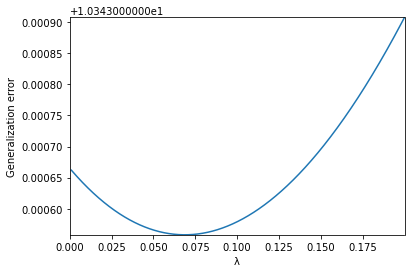

best lambda =  0.06870000000000002
min error =  10.343558252096418


In [16]:
#Plotting the generalization error as a function of lambda:

f = figure()
plot(lambdas, Error_test.mean(1))
xlabel('λ')
xlim(0,np.max(lambdas))
ylim(np.min(Error_test.mean(1)),np.max(Error_test.mean(1)))
ylabel('Generalization error')
    
show()

print( "best lambda = ", lambdas[np.argmin(Error_test.mean(1))] )
print( "min error = ", np.min(Error_test.mean(1)) )


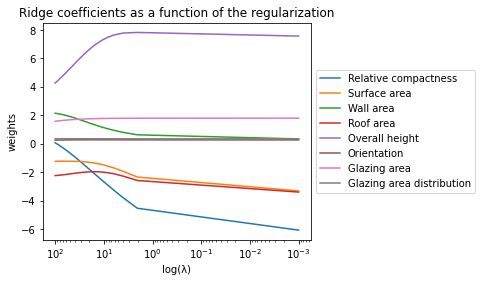

In [18]:
#Plotting the ridge coefficients as a function of the regularization 
reg_param = np.linspace(0.001,100)

coefs = []
for a in reg_param:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

ax = gca()

ax.plot(reg_param, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
xlabel("log(λ)")
ylabel("weights")
title("Ridge coefficients as a function of the regularization")
axis("tight")
# Put a legend to the right of the current axis
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
legend(['Relative compactness', 'Surface area', 'Wall area', 'Roof area', 'Overall height', 'Orientation', 'Glazing area', 'Glazing area distribution'], loc='center left', bbox_to_anchor=(1, 0.5))
show()



